In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import random

print(os.listdir('/kaggle/input/'))
print(os.listdir('/kaggle/input/rice-images-dataset/'))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

['rice-images-dataset']
['Karacadag', 'S0168169921003021.pdf', 'Basmati', 'Jasmine', 'Rice_Citation_Request.txt', 'Arborio', 'Ipsala']


In [3]:
rice_class=['Karacadag', 'Basmati', 'Jasmine', 'Arborio', 'Ipsala']
root_folder='/kaggle/input/rice-images-dataset/'

image shape (250, 250, 3)
image shape (250, 250, 3)
image shape (250, 250, 3)
image shape (250, 250, 3)
image shape (250, 250, 3)


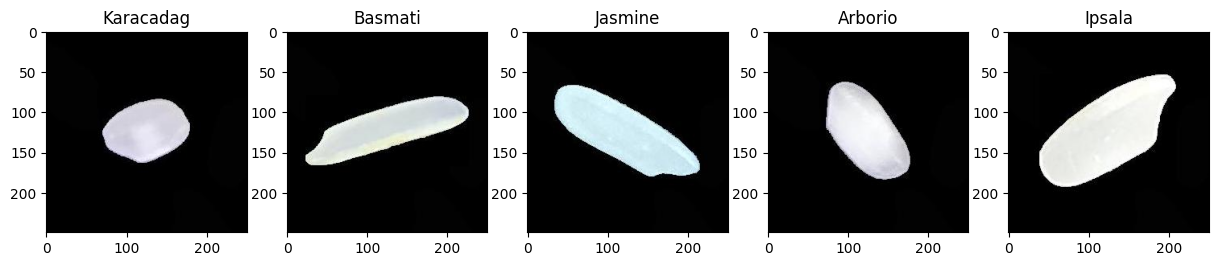

In [4]:
def show_images_in_row():
    plt.figure(figsize=(15, 5))  
    for idx, rice_name in enumerate(rice_class):
        image_folder_path = os.path.join(root_folder, rice_name)
        random_file = random.choice(os.listdir(image_folder_path))
        random_image_path = os.path.join(image_folder_path, random_file)
        
        img = cv2.imread(random_image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

        print(f'image shape {img_rgb.shape}')
        plt.subplot(1, len(rice_class), idx + 1) 
        plt.imshow(img_rgb)
        plt.title(rice_name)
    
    plt.show()

show_images_in_row()

In [5]:
!pip install split-folders
import splitfolders
output_folders='image_datsets'
splitfolders.ratio(root_folder, output=output_folders,
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 75000 files [05:34, 224.26 files/s]


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(
    directory='/kaggle/working/image_datsets/train',
    target_size=(255,255),
    class_mode='categorical',
    batch_size=32,
)

test_data = test_datagen.flow_from_directory(
    directory='/kaggle/working/image_datsets/test',
    target_size=(255,255),
    class_mode='categorical',
    batch_size=32
)

val_data = val_datagen.flow_from_directory(
    directory = '/kaggle/working/image_datsets/val',
    target_size=(255,255),
    class_mode='categorical',
    batch_size=32
)

Found 60000 images belonging to 5 classes.
Found 7500 images belonging to 5 classes.
Found 7500 images belonging to 5 classes.


In [7]:
input_shape = (255,255,3)

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(),
             metrics=['accuracy'])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 253, 253, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 251, 251, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 125, 125, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 123, 123, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 121, 121, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 60, 60, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │       180,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,015 (714.90 KB)

 Trainable params: 183,015 (714.90 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history=model.fit(train_data,
         epochs=10,
         steps_per_epoch = len(train_data)//32,
         validation_data = val_data,
         validation_steps = len(val_data)//32,
         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5,restore_best_weights=True, verbose=1)])

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5757 - loss: 1.0048 - val_accuracy: 0.9286 - val_loss: 0.2768
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.8993 - loss: 0.2900 - val_accuracy: 0.9241 - val_loss: 0.2702
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9248 - loss: 0.2101 - val_accuracy: 0.9375 - val_loss: 0.1793
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9221 - loss: 0.2315 - val_accuracy: 0.9598 - val_loss: 0.1530
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9573 - loss: 0.1297 - val_accuracy: 0.9643 - val_loss: 0.1115
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9411 - loss: 0.1720 - val_accuracy: 0.9554 - val_loss: 0.1530
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9527 - loss: 0.1362 - val_accuracy: 0.9821 - val_loss: 0.0655
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9643 - loss: 0.1278 - val_accuracy: 0.9643 - val_loss: 0.1029
Epo

In [10]:
model.evaluate(val_data)

235/235 ━━━━━━━━━━━━━━━━━━━━ 92s 391ms/step - accuracy: 0.9630 - loss: 0.1081


[0.10853877663612366, 0.9635999798774719]

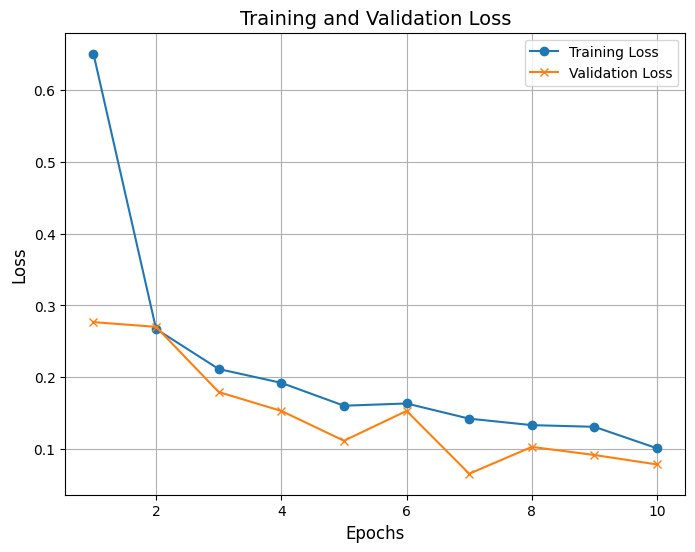

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='x')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid()
plt.show()

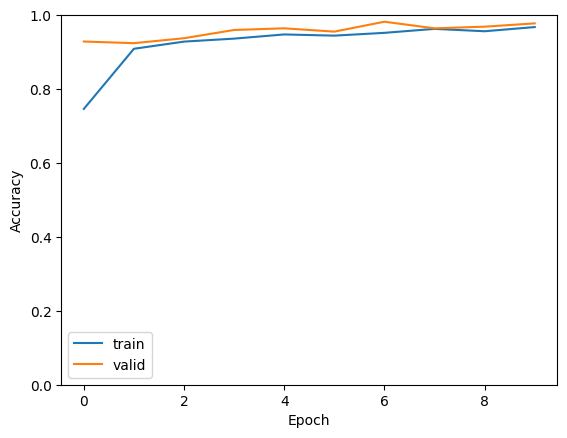

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])
     

In [13]:
model.save('rice_image_classification_cnn_model.h5')